# Complete simulations call centre model

In [1]:
using Random
using DelimitedFiles
using PrettyTables

using Plots
using LaTeXStrings

# Parameters
horiz = 20           # total horizon
n_ser = 2            # number of servers
YM = 10              # max buffer legnth before dropping calls
XM = 6               # max queue length 
phiM = 4             # max adimission to queue

t = 1:horiz

d_fn = "..//CC_simple//d_mat_Thu_22_May_2025_19_39_50.txt";
a_fn = "..//CC_simple//a_mat_Thu_22_May_2025_19_39_50.txt";

d_mat = DelimitedFiles.readdlm(d_fn);
a_mat = DelimitedFiles.readdlm(a_fn);

d = d_mat[1:horiz, 1];  # demand for incoming calls
a = a_mat[1:horiz, 1];  # abandonment for calls

In [2]:
function printTable(data, header)
    println("Results")
    pretty_table(data; header=header,formatters=ft_printf("%5.3f",1:11))
end


function plotData(evolution, ylabel, title)
    gr()
    plot(evolution, layout = 4, seriestype=:scatter, label=false,xlabel=[L"k" L"k" L"k" L"k"],ylabel=ylabel, title=title,
        palette=cgrad.([:grays :blues :heat :lightrainbow]), bg_inside=[:lightblue :lightblue :lightblue :lightblue])
end

plotData (generic function with 1 method)

In [3]:
# State variables
X = zeros(Int, horiz+1)     # current number of customers in queue x(k)
Y = zeros(Int, horiz+1)     # current number of customers in buffer y(k)

dr = zeros(Int, horiz+1)    # dropped due to full buffer
q = zeros(Int, horiz+1)     # customers entering the buffer
s = zeros(Int, horiz+1)     # number of served customers per timestep

z = zeros(Int, horiz+1)       # total number of custumers served
l = zeros(Int, horiz+1)       # total number of customers lost
bl = zeros(Float32, horiz+1)  # balking rate
n = zeros(Int, horiz+1)       # number of empty slots in the buffer

phi = ones(Int, horiz+1)   # customers removed from buffer and admited to queue

X[1] = 3  # initial state
Y[1] = 1
s[1] = n_ser
z[1] = 0


for k in 1:horiz
    phi[k] = min(XM-X[k], phiM, Y[k]) # not optimal
    n[k] = YM + phi[k] - Y[k] 
    q[k] = min(d[k], n[k])

    Y[k+1] = Y[k] - phi[k] + q[k] 

    # If queue exceeds max length, drop excess
    if d[k] > n[k]
        dr[k] = d[k]-n[k]  # dropped calls due to full buffer
    end

    X[k+1] = X[k] + phi[k] - s[k] - a[k]
    
    # Serve up to number of servers
    s[k+1] = min(X[k], n_ser)

    z[k+1] = z[k] + s[k]
    l[k+1] = l[k] + dr[k] + a[k]
    
    if k > 1
        bl[k] = l[k]/(l[k]+z[k])
    end
end

In [4]:
#  z[1:horiz,1], l[1:horiz,1], bl[1:horiz,1],n[1:horiz,1], q[1:horiz,1], dr[1:horiz,1], d
#  "z", "l", "bl", "n", "q", "dr", "d"

data = hcat(t, Y[1:horiz,1], phi[1:horiz,1], X[1:horiz,1], a, s[1:horiz,1])
header = (["t", "Y", "phi", "X", "a", "s"])

printTable(data, header)

Results
┌────────┬────────┬───────┬───────┬───────┬───────┐
│      t │      Y │   phi │     X │     a │     s │
├────────┼────────┼───────┼───────┼───────┼───────┤
│  1.000 │  1.000 │ 1.000 │ 3.000 │ 0.000 │ 2.000 │
│  2.000 │  7.000 │ 4.000 │ 2.000 │ 1.000 │ 2.000 │
│  3.000 │  6.000 │ 3.000 │ 3.000 │ 2.000 │ 2.000 │
│  4.000 │  6.000 │ 4.000 │ 2.000 │ 1.000 │ 2.000 │
│  5.000 │  9.000 │ 3.000 │ 3.000 │ 1.000 │ 2.000 │
│  6.000 │ 10.000 │ 3.000 │ 3.000 │ 2.000 │ 2.000 │
│  7.000 │ 10.000 │ 4.000 │ 2.000 │ 1.000 │ 2.000 │
│  8.000 │ 10.000 │ 3.000 │ 3.000 │ 1.000 │ 2.000 │
│  9.000 │ 10.000 │ 3.000 │ 3.000 │ 1.000 │ 2.000 │
│ 10.000 │  7.000 │ 3.000 │ 3.000 │ 1.000 │ 2.000 │
│ 11.000 │ 10.000 │ 3.000 │ 3.000 │ 1.000 │ 2.000 │
│ 12.000 │ 10.000 │ 3.000 │ 3.000 │ 1.000 │ 2.000 │
│ 13.000 │ 10.000 │ 3.000 │ 3.000 │ 2.000 │ 2.000 │
│ 14.000 │ 10.000 │ 4.000 │ 2.000 │ 2.000 │ 2.000 │
│ 15.000 │ 10.000 │ 4.000 │ 2.000 │ 0.000 │ 2.000 │
│ 16.000 │  8.000 │ 2.000 │ 4.000 │ 1.000 │ 2.000 │
│ 17

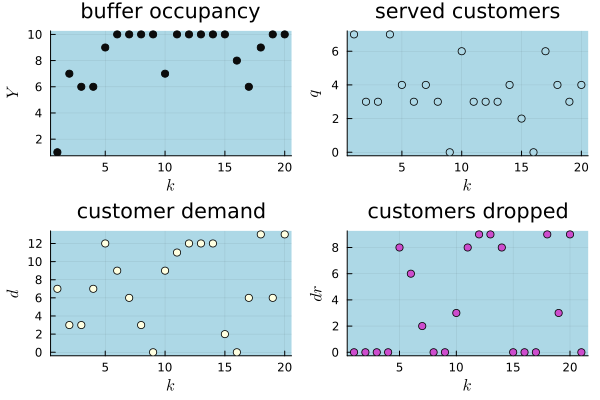

In [5]:
evolution = [Y[1:horiz,1], q[1:horiz,1], d[1:horiz,1], dr]
ylabel = [L"Y" L"q" L"d" L"dr"]
title = ["buffer occupancy" "served customers" "customer demand" "customers dropped"]

plotData(evolution, ylabel, title)

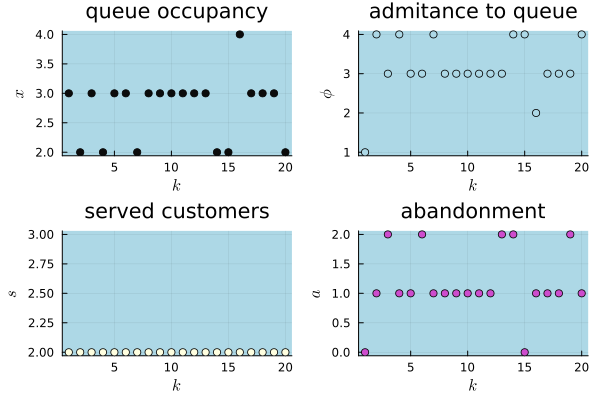

In [6]:
evolution = [X[1:horiz,1], phi[1:horiz,1], s[1:horiz,1], a[1:horiz,1]]
ylabel = [L"x" L"\phi" L"s" L"a"]
title = ["queue occupancy" "admitance to queue" "served customers" "abandonment"]

plotData(evolution, ylabel, title)

## Multiple entry points to conveyor

A new client can only enter the server after the previous one has been served.
The service time is variable and is represend as the random conveyor entry point. 

In [ ]:
# State variables
X_dl = zeros(Int, horiz+1)     # current number of customers in queue x(k)
s_dl = zeros(Int, horiz+1)     # number of customers entering server per timestep
s_end = zeros(Int, horiz)      # number of served customers per timestep
dr_dl = zeros(Int, horiz)      # dropped due to full buffer
z_dl = zeros(Int, horiz+1)     # custumers served

X_dl[1] = 3  # initial state
s_dl[1] = 0
z_dl[1] = 0

# Servers
t_serM = 4 # maximum time to serve one customer 
st_ser = zeros(n_ser, horiz+1) # state of servers
conv_ser = zeros(n_ser, t_serM) # servers conveyor


for k in 1:horiz
    for i in 1:n_ser
        
        conv_ser[i, 2:t_serM] = conv_ser[i, 1:t_serM-1] # shift the state of server i
        conv_ser[i, 1] = 0 # reset the first element of conveyor

        st_ser[i, k] = sum(conv_ser[i, :]) 
        # If server is free, start serving a customer
        if st_ser[i, k] == 0 && X_dl[k] > 0
            s_dl[k] += 1
            t_ser = rand(1:t_serM-1)  # randomly choose the service time for the server
            # println("k: $k, i: $i, t_ser: $t_ser")
            conv_ser[i, t_serM-t_ser] = 1
        end
        if st_ser[i, k] == 0 && k > 1 
            s_end[k] += 1
        end
    end


    X_dl[k+1] = X_dl[k] + d[k] - s_dl[k] -a[k]

    # If queue exceeds max length, drop excess
    if X_dl[k+1] > XM
        dr_dl[k] = X_dl[k+1] - XM  # dropped calls due to full queue
        X_dl[k+1] = XM
    else
        dr_dl[k] = 0
    end

    # Served custumers counted only after the service time
    z_dl[k+1] = z_dl[k] + s_end[k]

end